In [1]:
import sys
sys.path.insert(0, "/mnt/arquivos_linux/wile_C/Predictive_Maintenance_free_dataset/")
import torch
from matplotlib.pyplot import figure
from datasets import DatasetSinteticUnsupervisedLSTM

figure(figsize=(8, 6), dpi=80)

limiter = 2000

ABS_PATH = '/mnt/arquivos_linux/wile_C/Predictive_Maintenance_free_dataset'

test_dataset = DatasetSinteticUnsupervisedLSTM(dir_data=f'{ABS_PATH}/Datasets/sintetic_data/test_compressor_data.h5',
                                           context=400,
                                           stride=1)

test_loader = torch.utils.data.DataLoader(
                test_dataset, batch_size=1, shuffle=False
                )

100%|██████████████████████████████| 149600/149600 [00:00<00:00, 1545517.84it/s]

len dataset:149600


<Figure size 640x480 with 0 Axes>

In [2]:
def union_vector_predicted_dict(data_predict:dict):
    
    x_concat = data_predict[0]
    
    del data_predict[0]
    
    keys_predicted = list(data_predict.keys())
    
    for key in keys_predicted:
        x_concat = torch.concat((x_concat, data_predict[key]), dim=1)
        
        del data_predict[key]
    
    return x_concat

In [3]:
data_predict = torch.load(f"../sintetic_generate_data_LSTM.pt")

In [4]:
data_predict[0].shape

torch.Size([1, 1, 4])

In [5]:
vet_predict = union_vector_predicted_dict(data_predict)

In [6]:
vet_predict[0,400:,0]

tensor([0.7494, 0.7571, 0.7587, 0.7603, 0.7618, 0.7634, 0.7649, 0.7664, 0.7678,
        0.7693, 0.7707, 0.7722, 0.7736, 0.7750, 0.7763, 0.7777, 0.7790, 0.7803,
        0.7817, 0.7829, 0.7842, 0.7855, 0.7867, 0.7880, 0.7892, 0.7904, 0.7916,
        0.7927, 0.7939, 0.7950, 0.7962, 0.7973, 0.7984, 0.7995, 0.8006, 0.8016,
        0.8027, 0.8037, 0.8048, 0.8058, 0.8068, 0.8078, 0.8088, 0.8097, 0.8107,
        0.8116, 0.8126, 0.8135, 0.8144, 0.8153, 0.8162, 0.8171, 0.8179, 0.8188,
        0.8197, 0.8205, 0.8213, 0.8222, 0.8230, 0.8238, 0.8246, 0.8253, 0.8261,
        0.8269, 0.8276, 0.8284, 0.8291, 0.8299, 0.8306, 0.8313, 0.8320, 0.8327,
        0.8334, 0.8341, 0.8347, 0.8354, 0.8361, 0.8367, 0.8373, 0.8380, 0.8386,
        0.8392, 0.8398, 0.8404, 0.8410, 0.8416, 0.8422, 0.8428, 0.8434, 0.8439,
        0.8445, 0.8450, 0.8456, 0.8461, 0.8467, 0.8472, 0.8477, 0.8482, 0.8487,
        0.8492])

## Concat Vets

In [7]:
x_true, _ = test_loader.dataset[0]

get_n_elements = 5

for i in range(1, get_n_elements):
    
    x_second, _ = test_loader.dataset[i]
    
    x_true = torch.concat((x_true, x_second), dim=0)
    
x_true.shape, vet_predict.shape

(torch.Size([2000, 4]), torch.Size([1, 500, 4]))

### First channel

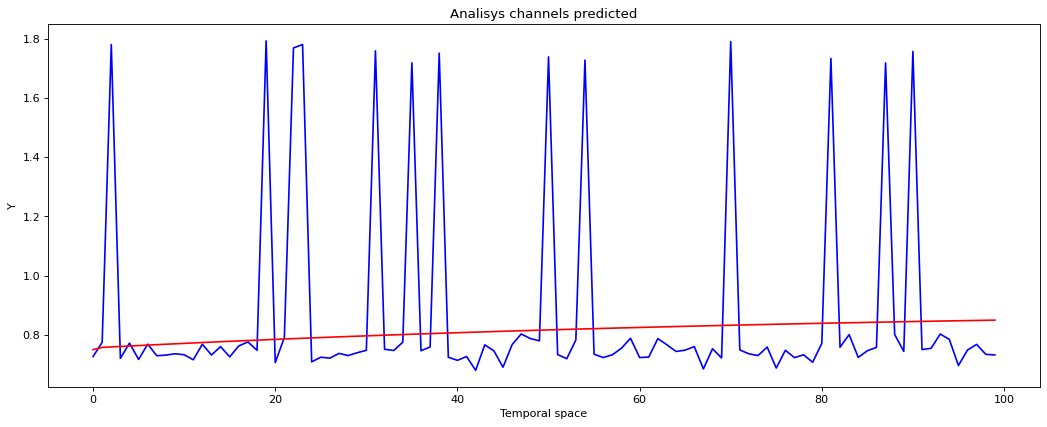

In [12]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(16, 6), dpi=80)
init_limiter = 400
limiter = 500

#plt.plot(data_normal_train[:limiter,0])

#fig, axs = plt.subplots(1, 2, figsize=(15, 15))

feature_channel = 0
plt.xlabel('Temporal space')
plt.ylabel('Y')
plt.title("Analisys channels predicted")
plt.plot(x_true[init_limiter:limiter, feature_channel], color='blue', label='sinal Real')
plt.plot(vet_predict[0][init_limiter:limiter, feature_channel], color='r', label='sinal previsto')


In [13]:
abs(x_true[init_limiter:limiter, feature_channel] - vet_predict[0][init_limiter:limiter, feature_channel])

tensor([0.0231, 0.0173, 1.0221, 0.0402, 0.0098, 0.0468, 0.0031, 0.0375, 0.0367,
        0.0337, 0.0384, 0.0568, 0.0058, 0.0435, 0.0165, 0.0524, 0.0169, 0.0046,
        0.0343, 1.0100, 0.0785, 0.0053, 0.9823, 0.9925, 0.0809, 0.0664, 0.0707,
        0.0559, 0.0644, 0.0558, 0.0490, 0.9617, 0.0475, 0.0528, 0.0259, 0.9172,
        0.0568, 0.0453, 0.9467, 0.0819, 0.0934, 0.0815, 0.1290, 0.0440, 0.0651,
        0.1214, 0.0462, 0.0109, 0.0273, 0.0360, 0.9225, 0.0841, 0.0990, 0.0366,
        0.9083, 0.0864, 0.0984, 0.0901, 0.0688, 0.0358, 0.1017, 0.1009, 0.0393,
        0.0610, 0.0843, 0.0804, 0.0693, 0.1455, 0.0780, 0.1096, 0.9584, 0.0842,
        0.0980, 0.1045, 0.0764, 0.1480, 0.0887, 0.1141, 0.1053, 0.1310, 0.0679,
        0.8944, 0.0822, 0.0401, 0.1177, 0.0958, 0.0850, 0.8756, 0.0428, 0.1003,
        0.9128, 0.0951, 0.0915, 0.0438, 0.0625, 0.1512, 0.0993, 0.0810, 0.1151,
        0.1176])